# <span id="chap_epidemic_compartmented"></span> Compartmented models of disease

When we talked about disease progression [earlier](epidemic-spreading.ipynb#sec_epidemic_spreading_progression), we talked in epidemiological terms about the latent period, infectious period, and so forth. These are the standard clinical terms, and in modelling diseases we stick close to them but change the focus slightly, away from talking about periods and towards talking about the state of a patient at a given moment. In fact we do the same thing in everyday life when we discuss diseases: we tend to talk about being being infected, having been infected, being immune, and so forth. We can think of these terms as buckets into which we drop individuals depending on their disease state. We refer to these buckets as **compartments**. The progress of a disease moves a person between compartments, for example becoming infected and then recovering (or dying). The ways in which we set up the compartments and the ways and rates at which people in the population under study move between them, form a **compartmented model** of a disease.

The simplest compartmented model is for diseases like the common cold. Medically, there is nothing simple about colds, hence their resistance to attempts to control them; but we can abstract this mathematically very simply by saying that an individual starts out **susceptible** to a cold, then becomes **infectious**, and after some time spent sneezing and generally transmitting the disease recovers but becomes susceptible to further infection. If we denote a susceptible individual by *S* and an infected one by *I*, a typical infectious trajectory will be from *S*, to *I*, and then to *S* again. We term this the **SIS model** of infection.

A lot of diseases don't behave like this, however: having been infected, an individual may die, or may recover and become immune to further infection. In some sense these two outcomes are the same, in that the individual &ndash; whether dead or recovered &ndash; takes no further part in the epidemic. (This immediately shows why one should be careful about mathematical abstractio, given that the two outcomes are in no way "the same" for the individual concerned.) If we say that a post-infection individual is **removed** from the model, denoted *R*, then we have an **SIR model**.

We might want to be more specific still and separate the latent period from the infectious period. In this case we might add a new compartment for **exposed** individuals, denoted *E*, from which individuals may recover (moving to *S* or *R*) or become infectious (moving to *I*), giving an **SEIR model**. Clearly there are many further possibilities too [[Het00]](Het00).

For each of these models, we can take a microscopic view and treat the compartments as the states of individuals: each individual is placed in a particular state. Alternatively we can take the macroscopic view and treat the compartments as sub-populations: the number of people in each state. The two views are just different ways of looking at the same data.

As well as states, we need to model the transitions individuals make between states. This is usually done by assigning a probability or rate to transitions between compartments. In an SIS model, for example, we might say that people move from *S* to *I* at a rate $\beta$ and from *I* back to *S* at a rate $\alpha$. For SIR, $\alpha$ might denote the rate at which people move from *I* to *R*. Computer scientists will recognise such a system as a probabilistic finite state machine; mathematicians will recognise it as a Markov process.

## <span id="sec_epidemic_compartmented_calculus"></span> Deterministic, macroscopic: the calculus of epidemic spreading

Epidemic spreading has a long history, and its study pre-dates network science by some time. It's certainly possible to study epidemic spreading in a population using more traditional mathematics: indeed, what is probably the first discussion of the SIR model appears in 1927 [[KMcK27]](KMcK27). Since the same approach appears in many applications to networks too, we'll discuss it first.

Suppose we have a population of $N$ people. At each time $t$ we divide the population into three sub-populations $s$, $i$, and $r$ corresponding to susceptible, infected, and recovered individuals, so $s + i + r = N$.

An epidemic is a process: a sequence of states that changes with time. Describing a realisation of a process means capturing how its state &ndash; the values of $s$, $i$, and $r$ &ndash; change over time. Or, to put it another way, $s$ is a function of time, and we want to know the value of $s(t + 1)$ as a function of $s(t)$, $i(t)$, and $r(t)$. It is actually easier to change our view slightly and ask about the difference between values, for example $\delta s = s(t + 1) - s(t)$. The dynamics then forms a system of difference equations. If we assume that the population is very large, and we compute the population changes at a very fine time resolution, we can instead form a set of ordinary differential equations for which the mathematics is simpler.

How does the population of susceptible nodes change? A node becomes infected (and ceases to be susceptible) with probability $\beta$ whenever a susceptible person meets an infected person. In this simple model we side-step the details of *how* people meet and make an [assumption of well-mixing](epidemic-spreading.ipynb#sec_epidemic_spreading_inhomogeneity): every susceptible and infected person that *could* meet, *do* meet, in each timestep. That means that every susceptible person at time $t$ meets $i(t)$ infected people, and therefore has $i(t)$ opportunities to become infected with probability $\beta$ at each encounter. There are $s(t)$ susceptible people, so $s(t)$ decreases in proportion to the number of encounters multiplied by the probability that each encounter results in an infection. We can simply convert this to a differential equation:

$$
\frac{ds}{dt} = -\beta s(t) i(t)
$$

(The minus sign denotes that the population $s(t)$ is *decreasing* as people become infected.) Similarly, we can describe the evolution of the two other sub-populations. Nodes become infected at a rate proportional to the number of encounters and the probability of infection; nodes recover at a rate proportional to the number of infected individuals and the probability of recovery: 

$$
\frac{di}{dt} = \beta s(t) i(t) - \alpha i(t)
\hspace{1in}
\frac{dr}{dt} = \alpha i(t)
$$

(Notice the signs again. $i(t)$ increases at the same rate as $s(t)$ decreases, and decreases at the same rate that $r(t)$ increases.) The assumption of uniform mixing is clearly a problem for human populations. It might make sense for a small venue where people move around a lot (a school playground, for example), but not a large population (a country), or even a small population with more restricted movement (the crowd at a football match). Another slightly different view is that the parameter $\beta$ actually conflates two issues: the proportion of the possible encounters that actually happen per time step, and the probability that one of these encounters results in infection. These limitation are among the reasons why it is better to model epidemics on networks that capture precisely this neglected structure, allowing $\beta$ to be purely about infection rates (which can be measured empirically).

## <span id="sec_epidemic_compartmented_analysis_time"></span> Analysing the system in time

To recap, we have a system of three differential equations in three unknowns:

$$
\frac{ds}{dt} = -\beta s(t) i(t)
\hspace{1in}
\frac{di}{dt} = \beta s(t) i(t) - \alpha i(t)
\hspace{1in}
\frac{dr}{dt} = \alpha i(t)
$$

We can simplify the system slightly by observing that $r(t) = N - s(t) - i(t)$ and only concern ourselves with the susceptible and infected sub-populations. We can also rescale the three sub-populations to be fractions of the overall population, so that $0 \leq s(t), i(t), r(t) \leq 1$ and $s(t) + i(t) + r(t) = 1$ at all times $t$. Put another way, $s(t)$ is the probability that a node selected at random from the population at time $t$ will be susceptible.

We can explore these equations to see how the populations will evolve under different parameters.

In [1]:
import math
import numpy

import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import seaborn

/Users/sd/programming/cncp/cncp/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Discretisation and numerical computation of differential equations can be a complicated undertaking in the general case because of various instabilities, but for this simple model we can use the simplest approach of direct forward propagation ([Euler's method](https://en.wikipedia.org/wiki/Euler_method)). We first define a function that takes as parameters the values of $\alpha$ and $\beta$ and returns three functions representing $\Delta s$, $\Delta i$, and $\Delta r$ for a unit timestep:

In [2]:
def make_sir( pInfect, pRecover ):
    '''Return functions for changes in the susceptible, infectious, and recovered
    sub-populations for particular rates of recovery and infection.
    
    :param pInfect: rate of infection
    :param pRecover: rate of recovery
    :returns: triple of change functions for dS, dI, and dR'''
    
    def dS( S, I, R ):
        return -pInfect * S * I
    def dI( S, I, R ):
        return pInfect * S * I - pRecover * I
    def dR( S, I, R ):
        return pRecover * I
    
    return (dS, dI, dR)

(We again use `pInfect` for $\beta$ and `pRecover` for $\alpha$.) We can then use these functions to simulate the dynamics of a disease with the given parameters. Suppose we set up a system with the parameters below, and then create three initial populations of susceptible, infectious, and recovered individuals:

In [3]:
# disease parameters
pRecover = 0.002
pInfect = 0.02

# what proportion of people are initially sick
pInfected = 0.01

# how many timesteps should we run the model for
T = 1000

# initial populations
sss = [ 1.0 - pInfected ]    # susceptible: all except those initially infected
iis = [ pInfected ]          # infected
rrs = [ 0.00 ]               # recovered: none to start with

The update functions are generated from the `pRecover` ($\alpha$) and `pInfect` ($\beta$) values:

In [4]:
(dS, dI, dR) = make_sir(pInfect, pRecover)

We then run the simulation for `T` timesteps, incrementing the initial populations at each timestep by the values returned by the update functions:

In [5]:
for t in range(0, T):
    sss.append(sss[t] + dS(sss[t], iis[t], rrs[t]))
    iis.append(iis[t] + dI(sss[t], iis[t], rrs[t]))
    rrs.append(rrs[t] + dR(sss[t], iis[t], rrs[t]))

This gives three time series describing the evolution of each sub-population, which we will want to plot graphically. We can now plot the three time series through time to show how the epidemic behaves:

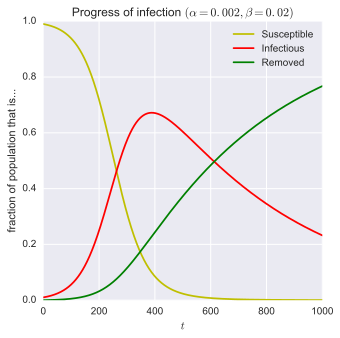

In [6]:
# set up the graph
fig = plt.figure(figsize = (5, 5))
ax = fig.gca()
plt.title('Progress of infection $(\\alpha = {a}, \\beta = {b})$'.format(a = pRecover, b = pInfect))
plt.xlabel('$t$')
plt.ylabel('fraction of population that is...')
ax.set_ylim([0.0, 1.0])

# plot the time series for the sub-populations
plt.plot(sss, 'y', label = 'Susceptible')
plt.plot(iis, 'r', label = 'Infectious')
plt.plot(rrs, 'g', label = 'Removed')
plt.legend(loc = 'upper right')

_ = plt.show()

It's worth considering what's happening here. The epidemic starts with the population completely susceptible apart from a few infected individuals. As the epidemic starts, the number of infected individuals rises steeply, reducing the number of susceptible people in the population by the same amount. Eventually infected people also begin to recover, which reduces the number of infecteds. SImultaneously, the number of susceptible people "available" to be infected reaches a point where infection becomes less likely, and the number of infecteds starts to fall. Eventually we will have a situation in which there are no infecteds and everyone (or *almost* everyone) has recovered having been infected.

The parameters we set clearly resulted in a severe epidemic: almost everyone was infected. The proportion isn't *exactly* zero, but it's close:

In [7]:
print 'Proportion of uninfected people at the end of the epidemic was {s}'.format(s = sss[-1])

Proportion of uninfected people at the end of the epidemic was 0.000443304473515


We could of course make the disease less infectious (by reducing $\beta$), or make it less severe and quicker to recover from (increase $\alpha$), and it's worth playing with the values to see what happens.

### <span id="sec_epidemic_compartmented_analysis_fractions"></span> Analysing population fractions

Let's return to the infection rate equation and ask how the size of the infected population varies:

\begin{align*}
    \frac{di}{ds} &= \frac{di}{dt} \frac{dt}{ds} \\
                  &= \frac{\beta s(t) i(t) - \alpha i(t)}{-\beta s(t) i(t)} \\
                  &= \frac{\alpha}{\beta} \frac{1}{s(t)} - 1
\end{align*}

This is a first-order linear differential equation that we can solve directly:

\begin{align*}
    i(t) &= \int \left ( \frac{\alpha}{\beta} \frac{1}{s(t)} - 1 \right ) ds \\
         &= \frac{\alpha}{\beta} ln(s(t)) - s(t) + c
\end{align*}

At $t = 0$ the number of infected nodes is typically very small, so $i(0) \approx 0$ and $s(0) \approx 1$, and therefore:

$$
    0 \approx \frac{\alpha}{\beta} ln(1) - 1 + c \approx -1 + c
$$

So if we set $c = 1$ we have that $i(s) = \frac{\alpha}{\beta} ln(s(t)) -s(t) + 1$. This is clearly a somewhat awkward equation, having terms in both $s(t)$ and $ln(s(t))$. We can explore it numerically however. First we build a function $i(s)$ for given values of $\beta$ and $\alpha$: 

In [8]:
def make_i( pInfect, pRecover):
    '''Construct a function for infection in terms of susceptibility.
    
    :param pInfect: probability of infection per timestep
    :param pRecover: probability of recovery per timestep
    :returns: infection function'''
    def i( s ):
        return (pRecover / pInfect) * math.log(s) - s + 1
    return i

We can then plot how the population of infected nodes varies with the population of susceptible nodes for different values of these parameters:

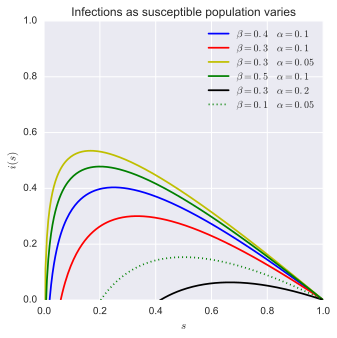

In [9]:
fig = plt.figure(figsize = (5, 5))
ax = fig.gca()
plt.xlabel("$s$")
plt.ylabel("$i(s)$")
plt.title('Infections as susceptible population varies')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# plot i(s) against s for different values of beta and alpha
s = numpy.linspace(0.000001, 1.0, num = 200)
for (pI, pR, pt) in [(0.4, 0.1, 'b-'),
                     (0.3, 0.1, 'r-'),
                     (0.3, 0.05, 'y-'),
                     (0.5, 0.1, 'g-'),
                     (0.3, 0.2, 'k-'),
                     (0.1, 0.05, 'g:')]:
    i = make_i(pI, pR)
    plt.plot(s, map(i, s), pt, label = "$\\beta = {pI:.2} \\quad \\alpha = {pR:.2}$".format(pI = pI,
                                                                                            pR = pR ))
plt.legend()

_ = plt.show()

Looking at these curves we see that they intersect the $i = 0$ axis at a positive value of $s$: that is to say, the number of infected individuals drops to zero when there are still some susceptible individuals left in the population &ndash; the epidemic does not infect everyone. It would be nice to know this value analytically, but that turns out to be hard: however, it is clear from the numerical results.

### <span id="sec_epidemic_compartmented_dieout"></span> When infections start to die out

We saw [earlier](#sec_epidemic_compartmented_analysis_time) what happens in time as the epidemic unfolds. Let's now also look at the graph above from a time perspective. The susceptible population starts off at close to 1 and reduces as the proportion of infecteds grows, until there are no infecteds left and the disease dies out. The thing to notice is that the time evolution of the graph therefore proceeds from right to left, following the trajectory of one of the lines chosen to repesent particular values of $\alpha$ and $\beta$. Each of these trajectories follows a similar path, with the population of infecteds growing steadily until the line quite suddenly bends-over and falls quite steeply towards zero.

This is just another illustration of the fact that the population of susceptibles controls the rate at which the infected population grows and, as the susceptibles are reduced, the rate slows. Simultaneously, the size of the infected population governs the rate of removal, and so "success" in infecting a lot of people leads to "failure" as  previously-infected people are removed. The balance between these two forces &ndash; infection and removal &ndash; is described by the equation:

$$
    \frac{di}{dt} = \beta s(t) i(t) - \alpha i(t)
$$

When this equation becomes negative, the disease as a whole is dying out. When does this happen? We can work it out analytically by re-writing $\frac{di}{dt}$ as:

$$
    \frac{di}{dt} = (\beta s(t) - \alpha) i(t)
$$

Since $i(t) \ge 0$ by definition, the only way this equation can go negative is when $\beta s(t) \le \alpha$, and so the critical point (when $\frac{di}{dt} = 0$) happens when $s(t) = \frac{\alpha}{\beta}$.

We can check this for a particular trajectory above. When $\beta = 0.3, \alpha = 0.1$, the critical point occurs when $s(t) \approx 0.33$, which looks correct by inspection of the above graph. Making the disease more infectious with the same recovery probability (for example $\beta = 0.4, \alpha = 0.1$ above) pushes up the maximum number of people infected, shifting the critical point to the left, as does reducing reducing the recovery probability while leaving the infection probability the same (for example $\beta = 0.3, \alpha = 0.05$ above); conversely, *increasing* the probability of recovery (for example $\beta = 0.3, \alpha = 0.2$ above) pushes the critical point to the right.

So it's the ratio between infection and removal that controls how an epidemic evolves. But that implies that there's an equivalence between the two elements: we can get the same epidemic behaviour by decreasing the infectiousness of the disease (decreasing $\beta$) if we *simultaneously* increase the time someone remains infected (decrease $\alpha$) so as to keep $\frac{\alpha}{\beta}$ constant.

## References

<a id="Het00">[Het00]</a> Herbert Hethcote. [The mathematics of infectious diseases](http://dx.doi.org/10.1137/S0036144500371907). SIAM Review **42**(4), pages 599&ndash;653. December 2000.

<a id="KMcK27">[KMcK27]</a> W.O. Kermack and A.G. McKendrick. [A contribution to the mathematical theory of epidemics](http://dx.doi.org/10.1098/rspa.1927.0118). Proceedings of the Royal Society A **115**(772). 1927.